# Introduction to Pandas

Pandas is a library that is commonly used for processing timeseries datasets in Excel and text format. If you are interested in any data analysis, mastering pandas will go a long way there. Pandas is capable of complex operations on timeseries data. For this example, we will do various operations on the COVID-19 statistics from the COVID Tracking Project.

In [ ]:
import pandas as pd
%pylab inline

The COVID tracking Project hosts all of the available case, death, and hospitalization data for all 50 states in the US. It is updated daily and is in CSV (comma-separated values) format. This is a common data format that you will encounter when analyzing data where the values are given as columns separated by commas in a text file. Pandas is especially designed to read such files. First, let's load the Covid Tracking Project data for the day. The command to do this is *pd.read_csv*. We will instruct pandas the column for which to parse the times using the *parse_dates* argument.

In [ ]:
url = 'https://covidtracking.com/api/v1/states/daily.csv'
states = pd.read_csv(url, parse_dates=['date'])

We can view the resulting DataFrame (states)

In [ ]:
states

Now here we look at the dataset and realize that it is not sorted in a way that makes data manipulation easy. In particular,
if we wanted the data for a specific state, we would have to use several commands to filter out the data by state. However,
with the power of pandas we can set the index to be any column we want it to be. So, why not instead reindex the dataset
to be sorted by state and by date?

In [ ]:
states = states.set_index(['state', 'date'])
states

Now, if we wanted to just view the DataFrame by a specific state, we can just do:

In [ ]:
st = 'WA'
states.loc[st, :]

However, something is still not quite right. We want the dates to be in chronological order. Thankfully, pandas allows us to 
do that too.

In [ ]:
states = states.sort_index()
states.loc[st]

If we then want to plot the cases per day for the state of Washington, we can then just do.

In [ ]:
states['positiveIncrease'].loc[st].plot()

This looks ugly and noisy due to the fact that, typically, states report fewer cases on the weekends than on the weekdays. 
After all the data reporting staff need a break. This is not a problem for pandas though. We can even do rolling averages. We
can even stack lines on the same plot, and provide the same arguments to plot as matplotlib's plot to customize
the line and legend entries.

In [ ]:
states['positiveIncrease'].loc[st].rolling(7).mean().plot(label='7 day average')
states['positiveIncrease'].loc[st].rolling(14).mean().plot(label='14 day average')
plt.legend()

We can even do standard operations on each pandas column as if it were a NumPy array. For example, if we wanted to calculate 
the test positivity rate (a measure of cases adjusted for testing) for the state of Washington, we can simply divide the number of new cases by the number of tests
then multiply by 100.

In [ ]:
positivity_rate = states['positiveIncrease'].loc[st].rolling(7).sum() / \
    states['totalTestResultsIncrease'].loc[st].rolling(7).sum() * 100
positivity_rate.plot(ylabel='Positivity rate [%]')

If we want to compare the epicurves of two states, we can also plot them on the same plot

Text(0, 0.5, 'New cases')

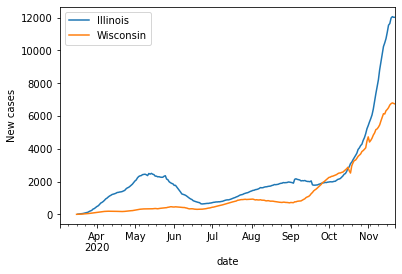

In [76]:
states['positiveIncrease'].loc['IL'].rolling(14).mean().plot(label='Illinois')
states['positiveIncrease'].loc['WI'].rolling(14).mean().plot(label='Wisconsin')
plt.legend()
plt.ylabel('New cases')